# 1. Introdução a Geopandas

**Fonte:**
este material é uma tradução e adaptação do notebook: <br/> https://github.com/Automating-GIS-processes/site/blob/master/source/notebooks/L2/geopandas-basics.ipynb

## 1.1 Baixando os dados

Para esta lição vamos usar o conjunto de dados dos bairros da cidade de Fortaleza.

Você pode encontrar um catálogo de dados da cidade, disponibilizados por diversidades entidades governamentais, no site: https://dados.fortaleza.ce.gov.br/catalogo

Primeiramente vamos fazer download dos dados, podemos baixar os dados direto do navegador ou utilizando o terminal:

Vamos baixar os [dados](https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json) com o comando
`wget` (para MacOS use `curl -O`). Baixe os dados na pasta do nosso projeto executando o seguinte comando no terminal  (caso não saiba como abrir o terminal [veja aqui](https://jupyterlab.readthedocs.io/en/stable/user/terminal.html)):

```
# Mude o diretório para a pasta Lesson 2
$ cd /home/carlos/Data-Science/AutoGIS/Leasson\ 2/data/
$ wget https://dados.fortaleza.ce.gov.br/dataset/8d20208f-25d6-4ca3-b0bc-1b9b371bd062/resource/781b13ec-b479-4b97-a742-d3b7144672ee/download/limitebairro.json
    
```
*Dica: você pode copiar e colar comandos para o terminal do JupyterLab pressionando SHIFT + RIGHT-CLICK com o seu mouse e selecionando 'Paste'.*

Agora, a nossa pasta `data` inclui um arquivo no formato JSON nomeado de `limitebairro.json`.

## 1.2 Lendo arquivos

Tipicamente o primeiro passo para fazer uma análise em python consiste em carregar os dados. Para sistemas GIS existem vários tipos de formatos como [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), e [GPKG](https://en.wikipedia.org/wiki/GeoPackage) que são os mais comuns. 

O [Geopandas](http://geopandas.org/io.html) é capaz de ler de todos estes formatos e muitos outros. Ler dados espaciais pode ser feito facilmente com o Geopandas usando a função `gpd.from_file()`.

Você pode instalar o geopandas no nosso ambiente, utilizando o seguinte comando: __conda install geopandas__

In [2]:
# Import necessary modules
import geopandas as gpd

# Set filepath 
fp = "data/limitebairro.json"

# Read file using gpd.read_file()
data = gpd.read_file(fp, driver='GeoJSON')

Agora que o arquivo json foi lido na variável `data`, vamos ver o seu formato:

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

Podemos ver que o tipo da variável é um `GeoDataFrame`. O objeto GeoDataFrame herda as funcionalidades do `pandas.DataFrame` adicionando operações sobre dados espaciais, usando abordagens semelhantes as estruturas de dados do Pandas (por isso o nome Geopandas). O `GeoDataFrame` possui algumas características especiais e funções internas que facilitam análises de estruturas geometricas.

Vamos dar uma olhada nos nosso dados, mostrando as cinco primeiras linhas utilizando a função `head()`.

In [8]:
data.head(5)

,id,GID,NOME,geometry
0,Limite Bairro.fid-2be50750_153af4824fe_2d2e,6,PASSARE,"POLYGON ((-38.53982 -3.79554, -38.53974 -3.795..."
1,Limite Bairro.fid-2be50750_153af4824fe_2d2f,21,CAIS DO PORTO,"POLYGON ((-38.47933 -3.72091, -38.47930 -3.720..."
2,Limite Bairro.fid-2be50750_153af4824fe_2d30,22,CIDADE 2000,"POLYGON ((-38.46765 -3.74968, -38.46751 -3.749..."
3,Limite Bairro.fid-2be50750_153af4824fe_2d31,23,ALTO DA BALANCA,"POLYGON ((-38.51716 -3.76998, -38.51726 -3.769..."
4,Limite Bairro.fid-2be50750_153af4824fe_2d32,17,BARRA DO CEARA,"POLYGON ((-38.56888 -3.70169, -38.56893 -3.701..."


Quando utilizamos dados espaciais, é uma boa ideia explorar os dados utilizando um mapa. Criar um mapa simples de um `GeoDataFrame` é muito fácil: você pode utilizar a função ``.plot()`` que cria um mapa baseado nas geometrias dos dados. Na verdade o Geopandas utiliza o Matplotlib para criar os mapas.

Vamos testar a função ``.plot()`` e ver como os nosso dados se parecem em um mapa.

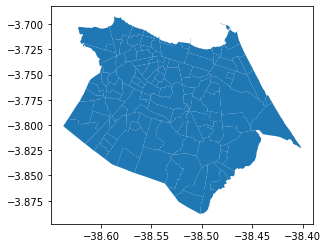

In [9]:
data.plot()

Como podemos ver, é realmente muitio fácil produzir um mapa de um arquivo JSON utilizando o geopandas. O módulo automáticamente posiciona seu mapa de uma forma que todos os dados são inseridos.

## 1.2 Escrevendo um arquivo

Escrever os dados espaciais no disco utilizando o GeoPandas também é muito fácil.

Vamos selecionar apenas as 50 primeiras linhas dos nossos dados e escrever em um novo arquivo utilizando a função ``gpd.to_file()``. Desta vez, para salvar os arquivos, vamos utilizar o formato padrão Shapefile (.shp).

In [10]:
# Create a output path for the data
outfp = "data/limitebairro.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

Perceba que os arquivos Shapefile são constituidos de muitos arquivos separados, como ´.dbf´ que contém informações dos atributos, o arquivo '.prj' que contém informações sobre coordenada do sistema de referência. 

**TAREFA:** Vamos ler o novo arquivo Shapefile criado e ver como os dados se parecem.

In [26]:
## CODE HERE ##

## 1.3 Operando com geometrias no Geopandas

O geopandas tira vantagem das geometrias do modulo Shapely que usamos anteriormente. As geometrias são armazenadas em uma coluna chamado *geometry* que é um nome padrão para armazenar as informações de geometria no geopandas.

Vamos ver os 5 primeiros dados da coluna 'geometry':

In [11]:
# It is possible to get a specific column by specifying the column name within square brackets []
print(data['geometry'].head(5))

0    POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...
1    POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...
2    POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...
3    POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...
4    POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...
Name: geometry, dtype: geometry


Como podemos ver a coluna `geometry` contém valores familiares, que são basicamente os objetos `Polygons` que usamos anteriormente do módulo Shapely. Como os dados espaciais estão armazenados em objetos Shapely, **logo é possível usar todas as funcionalidades do módulo Shapely**.

- Vamos testar essa funcionalidade, percorrendo por nossos dados e mostrando a `area` dos cinco primeiros Polígonos.
  - Nós podemos percorrer as linhas dos nossos dataset usando a função `iterrows()`

In [12]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print("Polygon area at index {index} is: {area:.5f}".format(index=index, area=poly_area))

Polygon area at index 0 is: 0.00058
Polygon area at index 1 is: 0.00021
Polygon area at index 2 is: 0.00004
Polygon area at index 3 is: 0.00007
Polygon area at index 4 is: 0.00033


Como você pode observar, todas as funcionalidade do **Pandas**, como a função `iterrows()` estão diretamente disponíveis no Geopandas sem precisar chamar o pandas diretamente, isso porque o Geopandas é uma **extensão** do Pandas.

- Vamos criar um nova coluna no nosso GeoDataFrame em que nós calculamos e armazenamos as áreas dos polígonos individualmente em uma nova coluna. Calcular a área dos nosso polygons é muito fácil no geopandas usando o atributo ``GeoDataFrame.area``, desta forma, não é preciso percorrer todos os dados linha por linha, como fizemos anteriormente.

In [15]:
# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

# Print first 5 rows of the data
data.head(5)

,id,GID,NOME,geometry,area
0,Limite Bairro.fid-2be50750_153af4824fe_2d2e,6,PASSARE,"POLYGON ((-38.53982 -3.79554, -38.53974 -3.795...",0.000584
1,Limite Bairro.fid-2be50750_153af4824fe_2d2f,21,CAIS DO PORTO,"POLYGON ((-38.47933 -3.72091, -38.47930 -3.720...",0.000209
2,Limite Bairro.fid-2be50750_153af4824fe_2d30,22,CIDADE 2000,"POLYGON ((-38.46765 -3.74968, -38.46751 -3.749...",0.000041
3,Limite Bairro.fid-2be50750_153af4824fe_2d31,23,ALTO DA BALANCA,"POLYGON ((-38.51716 -3.76998, -38.51726 -3.769...",0.000075
4,Limite Bairro.fid-2be50750_153af4824fe_2d32,17,BARRA DO CEARA,"POLYGON ((-38.56888 -3.70169, -38.56893 -3.701...",0.000334


Como podemos ver o nosso dataset ganhou uma nova coluna com nome `area` em que foram armazenadas as áreas de cada polígono.

- Vamos também checar outras funções como `min`, `max` e `mean` que são funções bem familiares do pandas.

In [22]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 5), min=round(min_area, 5), mean=round(mean_area, 5)))

Max area: 0.00112
Min area: 3e-05
Mean area: 0.00021


O polígono com maior área no nosso dataset apresenta 0.00112 graus decimais quadrados. Para realizar operações sobre esses dados, seria mais interessante ter essas informações em km², na próxima aula, vamos ver como realizar uma transformação sobre os dados para obter resultados em metros e kilometros.

## 1.4 Criando geometrias para um GeoDataFrame

Desde que o geopandas tira vantagem dos objetos do módulo shapely, é possível criar um Shapefile do zero, passando objetos geometricos para um `GeoDataFrame`. Assim podemos converter coordenadas em um arquivo texto (.csv) para arquivos Shapefile, GeoJSON e outros formatos. Em seguida vamos ver como isto pode ser feito.

- Vamos primeiro criar um `GeoDataFrame` vázio.

In [23]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


como pode ser observado, o `GeoDataFrame` está vázio, pois ainda não armazenamos nenhum dado nele.

- Agora vamos criar uma nova coluna chamada `geometry` que armazenará os nosso objetos geometricos.

In [24]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Agora temos a colina `geometry` no nosso GeoDataFrame, mas não temos nenhum dado armazenado ainda.

- Vamos criar um `Polygon` aproximado representando o Campus do Pici da UFC, que posteriormente vamos adicionar ao nosso GeoDataFrame:

In [27]:
# Approximate coordinates of Campus do Pici, UFC (Fortaleza/CE)
coordinates = [(-3.73745, -38.57351), (-3.74404, -38.58482), (-3.74632, -38.58471), (-3.74620, -38.58146),
               (-3.74711, -38.58200), (-3.75738, -38.57242), (-3.75680, -38.57186), (-3.75608, -38.57256),
               (-3.75490, -38.57090), (-3.75400, -38.57079), (-3.74978, -38.57464), (-3.74648, -38.57122),
               (-3.74857, -38.56920), (-3.74600, -38.56670), (-3.74132, -38.56938), (-3.73688, -38.56933)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((-3.73745 -38.57351, -3.74404 -38.58482, -3.74632 -38.58471, -3.7462 -38.58146, -3.74711 -38.582, -3.75738 -38.57242, -3.7568 -38.57186, -3.75608 -38.57256, -3.7549 -38.5709, -3.754 -38.57079, -3.74978 -38.57464, -3.74648 -38.57122, -3.74857 -38.5692, -3.746 -38.5667, -3.74132 -38.56938, -3.73688 -38.56933, -3.73745 -38.57351))


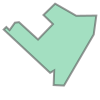

In [28]:
poly

Agora que temos no objeto `Polygon`, vamos inseri-lo na coluna ´geoemtry´ do nosso GeoDataFrame, na posição 0:

In [29]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((-3.73745 -38.57351, -3.74404 -38.584...


Legal, agora nós temos um `GeoDataFrame` com um polígono, já podemos exportar para um arquivo Shapefile. Além disso podemos querer adicionar mais informações as nossas geometrias.

- Antes de salvar o nosso novo dataframe,  vamos adicionar uma nova coluna chamada de `location` com o texto `Campus do Pici`, que descreve o local que representa a geometria. 

In [30]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = 'Campus do Pici'

# Let's check the data
print(newdata)

                                            geometry        location
0  POLYGON ((-3.73745 -38.57351, -3.74404 -38.584...  Campus do Pici


Certo, agora temos informações adicionais para reconhecer o que a nossa geoemetria representa.

Antes de exportar os nossos dados é um  boa ideia determinar o **sistema de referência de coordenadas (projeção) do nosso GeoDataFrame.** Para isso, nós podemos utilizar o atributo `.crs` que mostra o sistema de coordenadas dos dados, que no nosso caso vai estar vázio, pois estamos criando um `GeoDataFrame` do zero.

Veremos mais sobre projeção na próxima aula.

- Verifique a projeção do nosso recém criado GeoDataFrame


In [31]:
print(newdata.crs)

None


- Vamos adicionar um crs para o nosso GeoDataFrame. O padrão utilizado no noso exemplo foi o sistema de coordenadas WGS84 (código epsg: 4326):

In [37]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = 'EPSG:4326'

# Let's see how the crs definition looks like
print(newdata.crs)

EPSG:4326


Como podemos ver, agora nós possuimos um sistema de referência de coordenadas (CRS) no nosso 
`GeoDataFrame`. A informação de CRS aqui é uma string em python contendo os valores necessários para o geopandas criar um arquivo `.prj` para o nosso Shapefile, que contém as informações de CRS.

- Finalmente, podemos exportar o nosso GeoDataFrame utilizando a função `.to_file()`. A função funciona basicamente como as funções de exportação do numpy ou pandas, mas aqui precisamos apenas especificar o caminho no qual o nosso shapefile será salvo:

In [38]:
# Determine the output path for the Shapefile
outfp = "data/pici.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

## Resumo

Neste tutorial nós introduzimos os primeiros passaos para usar geopandas. Mais especificamente 
voce deve ter aprendido a fazer:

**1)** Ler dados de Shapefile usando geopandas,

**2)** Escrever dados GeoDataFrame de Shapefile usando geopandas,

**3)** criar um GeoDataFrame do zero.